In [0]:

import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch

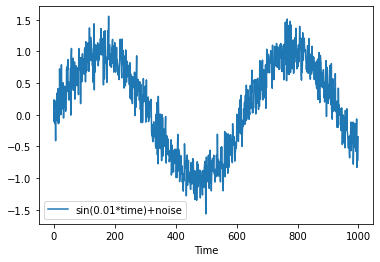

In [3]:
import torch

T = 1000
time = torch.arange(0.0, T)
X = torch.sin(0.01 * time) + 0.2 * torch.randn(T)
plt.plot(time.numpy(), X.numpy(), label="sin(0.01*time)+noise");
plt.legend();
plt.xlabel("Time");
plt.show()

In [0]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Hyperparameter
batch_size, train_number = 16, 600

# timestamp
tau = 4
features = torch.zeros((T-tau, tau)) # AR Model needs tau inputs: shape is (996, 4)

for i in range(tau):
    features[:, i] = X[i:(T-tau + i)]
labels = X[tau:] # shape is (996, )

# Prepare DataLoader
train_data = TensorDataset(features[:train_number, :], labels[:train_number])
test_data = TensorDataset(features[train_number:, :], labels[train_number:])

In [0]:
Z=[]
for i in range(0,1000):
  x=np.sin(0.01 * i) + 0.2 * np.random.randn(1)
  # print(x.shape)
  Z.append( x)

X_train = []
y_train = []

for i in range(100, 600):
    X_train.append(Z[i-100:i])
    y_train.append(Z[i])
    # print(i)
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test = []
y_test = []

for i in range(600, 1000):
    X_test.append(Z[i-100:i])
    y_test.append(Z[i])
    # print(i)
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [6]:
y_train.shape

(500, 1)

In [7]:
X.shape

torch.Size([1000])

In [0]:
class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers
        )
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x, h_state):
        r_out, hidden_state = self.rnn(x, h_state)
        
        hidden_size = hidden_state[-1].size(-1)
        r_out = r_out.view(-1, hidden_size)
        outs = self.out(r_out)

        return outs, hidden_state

In [0]:
# Hyperparameters
n_hidden = 50
lr = 0.001
epochs = 200

model = RNN(100, n_hidden, 2, 1)
# torch.autograd.set_detect_anomaly(True)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [11]:
print(model)
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

RNN(
  (rnn): RNN(100, 50, num_layers=2)
  (out): Linear(in_features=50, out_features=1, bias=True)
)


In [20]:
hidden_state = None
inputs = Variable(torch.from_numpy(X_train).float())
labels = Variable(torch.from_numpy(y_train).float())

for epoch in range(100):
  output=None
  hidden_state=None


  output, hidden_state = model(inputs, hidden_state) 
  loss=0

  loss = criterion(output.view(-1), labels)
  optimiser.zero_grad()
  loss.backward(retain_graph=True)                     # back propagation
  optimiser.step()                                     # update the parameters
  if epoch %10 ==0 :
    print('epoch {}, loss {}'.format(epoch,loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([500, 1])) that is different to the input size (torch.Size([500])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 0.5914531946182251
epoch 10, loss 0.591428816318512
epoch 20, loss 0.5914047360420227
epoch 30, loss 0.5913933515548706
epoch 40, loss 0.5913884043693542
epoch 50, loss 0.5913856625556946
epoch 60, loss 0.5913843512535095
epoch 70, loss 0.5913834571838379
epoch 80, loss 0.5913829207420349
epoch 90, loss 0.5913822650909424


In [0]:
test = Variable(torch.from_numpy(X_test).float())
rnntest, hidden_state = model(test, hidden_state)

In [0]:
class RNN(nn.Module):
    def __init__(self, i_size, h_size, n_layers, o_size):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(
            input_size=i_size,
            hidden_size=h_size,
            num_layers=n_layers
        )
        self.out = nn.Linear(h_size, o_size)

    def forward(self, x, h_state):
        r_out, hidden_state = self.rnn(x, h_state)
        
        hidden_size = hidden_state[-1].size(-1)
        r_out = r_out.view(-1, hidden_size)
        outs = self.out(r_out)

        return outs, hidden_state
# Hyperparameters
n_hidden = 50
lr = 0.0001
epochs = 200

lstmmodel = RNN(100, n_hidden, 2, 1)
# torch.autograd.set_detect_anomaly(True)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [23]:
hidden_state = None
inputs = Variable(torch.from_numpy(X_train).float())
labels = Variable(torch.from_numpy(y_train).float())

for epoch in range(100):
  output=None
  hidden_state=None


  output, hidden_state = lstmmodel(inputs, hidden_state) 
  loss=0

  loss = criterion(output.view(-1), labels)
  optimiser.zero_grad()
  loss.backward(retain_graph=True)                     # back propagation
  optimiser.step()                                     # update the parameters
    
  if epoch %10 ==0 :
    print('epoch {}, loss {}'.format(epoch,loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([500, 1])) that is different to the input size (torch.Size([500])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 0.5919889807701111
epoch 10, loss 0.5919889807701111
epoch 20, loss 0.5919889807701111
epoch 30, loss 0.5919889807701111
epoch 40, loss 0.5919889807701111
epoch 50, loss 0.5919889807701111
epoch 60, loss 0.5919889807701111
epoch 70, loss 0.5919889807701111
epoch 80, loss 0.5919889807701111
epoch 90, loss 0.5919889807701111


In [0]:
lstmtest, hidden_state = lstmmodel(test, hidden_state)

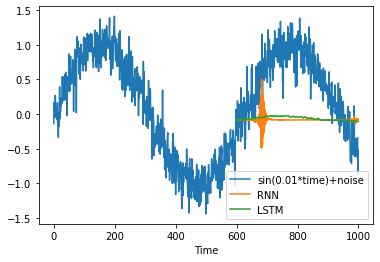

In [25]:
T = 1000
time = torch.arange(0.0, T)
X = torch.sin(0.01 * time) + 0.2 * torch.randn(T)
plt.plot(time.numpy(), X.numpy(), label="sin(0.01*time)+noise");
plt.plot(time[600:].numpy(), rnntest.detach().numpy(), label='RNN')
plt.plot(time[600:].numpy(), lstmtest.detach().numpy(), label='LSTM')
plt.legend();
plt.xlabel("Time");
plt.show()